In [1]:
import pandas as pd
import os

data_df = pd.read_csv(os.path.join('.','electric-cars.csv'))
data_df.head(1)

,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460


In [2]:
data_df.describe()

,Temperature [°F],Energy Consumption [Wh/mil]
count,57.000000,57.000000
mean,37.719298,336.122807
std,31.111409,56.795394
min,-15.000000,260.000000
25%,12.000000,290.000000
50%,37.000000,342.000000
75%,62.000000,365.000000
max,92.000000,540.000000


In [3]:
# Generate a list of indexes

import numpy as np

n = len(data_df)

indexes = np.arange(n)
print("Indexes = ",indexes)

Indexes =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]


In [6]:
# Split into train/test indexes
split_idx = int(n*0.7)

train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

print('train indexes:', train_idx) # [0 1 2 ..]
print('test indexes:', test_idx) # [39 40 41 ..]


train indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
test indexes: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]


In [19]:

# Get x and y columns
x = data_df.iloc[:,0].values
y = data_df.iloc[:,1].values

x_tr, y_tr = x[train_idx], y[train_idx]

x_te, y_te = x[test_idx], y[test_idx]

print('train:', x_tr.shape, y_tr.shape) # (39,) (39,)
print('test:', x_te.shape, y_te.shape) # (18,) (18,)

train: (39,) (39,)
test: (18,) (18,)


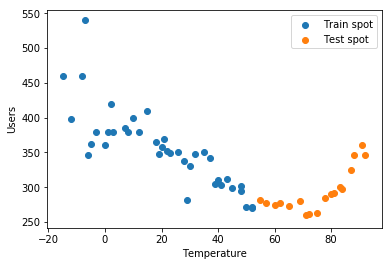

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x_tr,y_tr,label="Train spot")
plt.scatter(x_te,y_te,label="Test spot")

plt.xlabel('Temperature')
plt.ylabel('Users')

plt.legend()

plt.show()

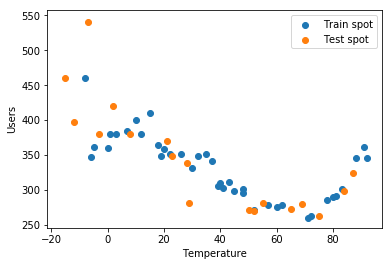

In [38]:
# This split is not good, we must use a shuffle function to choose spots

n = len(data_df)
indexes = np.arange(n)

np.random.seed(0)
np.random.shuffle(indexes)

split_idx = int(n*0.7)

train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

x_tr, y_tr = x[train_idx], y[train_idx]

x_te, y_te = x[test_idx], y[test_idx]

plt.scatter(x_tr,y_tr,label="Train spot")
plt.scatter(x_te,y_te,label="Test spot")

plt.xlabel('Temperature')
plt.ylabel('Users')

plt.legend()

plt.show()

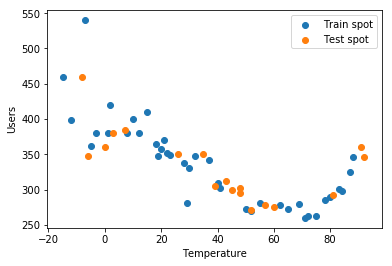

In [60]:
# Split data using train_test_split() from sklearn.model_selection
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x,y, test_size=0.3, random_state=0 )


plt.scatter(x_tr,y_tr,label="Train spot")
plt.scatter(x_te,y_te,label="Test spot")

plt.xlabel('Temperature')
plt.ylabel('Users')

plt.legend()

plt.show()


MSE Train degree = 5 =  719
MSE Train degree = 10 =  706
MSE Test degree = 5 =  651
MSE Test degree = 10 =  1218


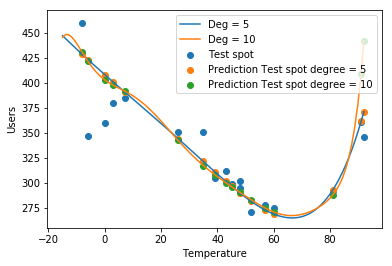

In [72]:
# Evaluate two models: Polyfit deg=5 and deg=10

# Use mse function from sklearn.metrics
from sklearn.metrics import mean_squared_error as mse

coef_5 = np.polyfit(x_tr,y_tr,deg=5)
coef_10 = np.polyfit(x_tr,y_tr,deg=10)

x_values = np.linspace(x.min(),x.max(),num=100)




# Calculate MSE on Train spots
mse_tr_5 = mse(y_tr,np.polyval(coef_5,x_tr))
print("MSE Train degree = 5 = ",int(mse_tr_5))
mse_tr_10 = mse(y_tr,np.polyval(coef_10,x_tr))
print("MSE Train degree = 10 = ",int(mse_tr_10))

# Calculate MSE on Test spots
mse_te_5 = mse(y_te,np.polyval(coef_5,x_te))
print("MSE Test degree = 5 = ",int(mse_te_5))
mse_te_10 = mse(y_te,np.polyval(coef_10,x_te))
print("MSE Test degree = 10 = ",int(mse_te_10))

plt.plot(x_values,np.polyval(coef_5,x_values),label='Deg = 5')
plt.plot(x_values,np.polyval(coef_10,x_values),label='Deg = 10')
#plt.scatter(x_tr,y_tr,label="Train spot")
plt.scatter(x_te,y_te,label="Test spot")

plt.scatter(x_te,np.polyval(coef_5,x_te),label="Prediction Test spot degree = 5")
plt.scatter(x_te,np.polyval(coef_10,x_te),label="Prediction Test spot degree = 10")

plt.xlabel('Temperature')
plt.ylabel('Users')

plt.legend()

plt.show()